<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Density-Based Clustering

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Use DBSCAN to do Density based clustering
*   Use Matplotlib to plot clusters


Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor.
Additionally, Density-based clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this section, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.


Import the following libraries:

<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>DBSCAN</b> from <b>sklearn.cluster</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets.samples_generator</b> </li>
    <li> <b>StandardScaler</b> from <b>sklearn.preprocessing</b> </li>
    <li> <b>matplotlib.pyplot as plt</b> </li>
</ul> <br>
Remember <b> %matplotlib inline </b> to display plots


In [449]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

## make blobs dataset

The function below will generate the data points and requires these inputs:

<ul>
    <li> <b>centroidLocation</b>: Coordinates of the centroids that will generate the random data. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation) </li>
    <ul> <li> Example: 1500 </li> </ul>
    <li> <b>clusterDeviation</b>: The standard deviation of the clusters. The larger the number, the further the spacing of the data points within the clusters. </li>
    <ul> <li> Example: 0.5 </li> </ul>
</ul>


In [450]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

Use <b>createDataPoints</b> with the <b>3 inputs</b> and store the output into variables <b>X</b> and <b>y</b>.


In [451]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

In [452]:
X[:5] #x,y coordinates

array([[ 1.16789   ,  0.43730611],
       [ 0.48285616, -1.54003296],
       [-1.6525061 ,  0.88010551],
       [ 0.94640469,  0.53565795],
       [ 0.03412504, -1.4162235 ]])

In [453]:
y[:5] #label

array([0, 1, 2, 0, 1])

## DBSCASN clustering

### Modelling
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms  which works based on density of object.
The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points\
**Epsilon** determine a specified radius that if includes enough number of points within, we call it dense area\
**minimumSamples** determine the minimum number of data points we want in a neighborhood to define a cluster.

In [454]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_ #different each time
labels.size

1500

### Distinguish outliers

Let's Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.


In [455]:
core_samples = db.core_sample_indices_.size 
core_samples

1493

In [456]:
outlier = db.labels_[db.labels_ == -1].size 
outlier

1

In [457]:
border_samples = labels.size - core_samples - outlier
border_samples

6

### Data visualization


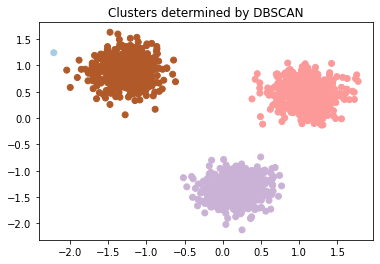

In [458]:
plt.figure(figsize=(6,4))

plt.scatter(X[:,0], X[:,1],c=labels, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

plt.show()

## K-means Clustering
To better understand differences between partitional and density-based clustering, try to cluster the above dataset into 3 clusters using k-Means.\
Notice: do not generate data again, use the same dataset as above.


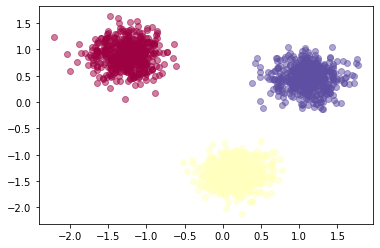

In [459]:
from sklearn.cluster import KMeans 

k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)

# color map - pass in as "c" argument, need no "cmap" for plots
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))

fig = plt.figure(figsize=(6, 4))
ax = plt.gca()

for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k) # true if equal to a specfic cluster 
    
    ax.scatter(X[my_members, 0], X[my_members, 1], c=[col], marker=u'o', alpha=0.5)
    
plt.show()

<details><summary>Click here for the solution</summary>

```python
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()

```

</details>
